# Customer_Segmentation_Analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [5]:
df=df.drop(columns="CustomerID")

In [6]:
#changing gender column to int type by using 1 and 0
data=pd.get_dummies(df["Gender"])
df=pd.concat([df,data],axis=1)

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,False,True
1,Male,21,15,81,False,True
2,Female,20,16,6,True,False
3,Female,23,16,77,True,False
4,Female,31,17,40,True,False
...,...,...,...,...,...,...
195,Female,35,120,79,True,False
196,Female,45,126,28,True,False
197,Male,32,126,74,False,True
198,Male,32,137,18,False,True


In [8]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]].copy()

In [10]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'Age vs Annual_Income')

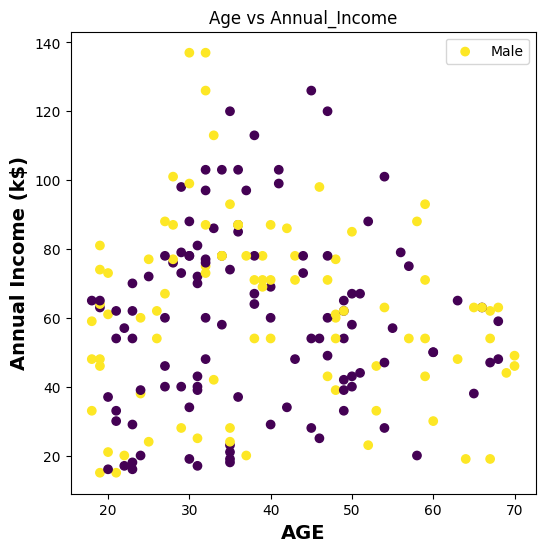

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(df["Age"],df["Annual Income (k$)"],c=df.Gender.astype('category').cat.codes)
plt.xlabel("AGE",
            fontweight ='bold',
            size=14)
plt.ylabel("Annual Income (k$)",
           fontweight ='bold',
           size=14)
plt.legend(labels=df.Gender)
plt.title("Age vs Annual_Income")

<BarContainer object of 200 artists>

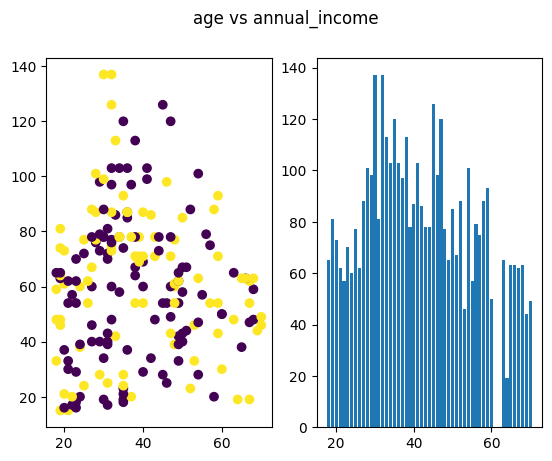

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('age vs annual_income')
ax1.scatter(df["Age"],df["Annual Income (k$)"],c=df.Gender.astype('category').cat.codes)
ax2.bar(df["Age"],df["Annual Income (k$)"])

Text(0.5, 1.0, 'Age vs Spending Score (1-100)')

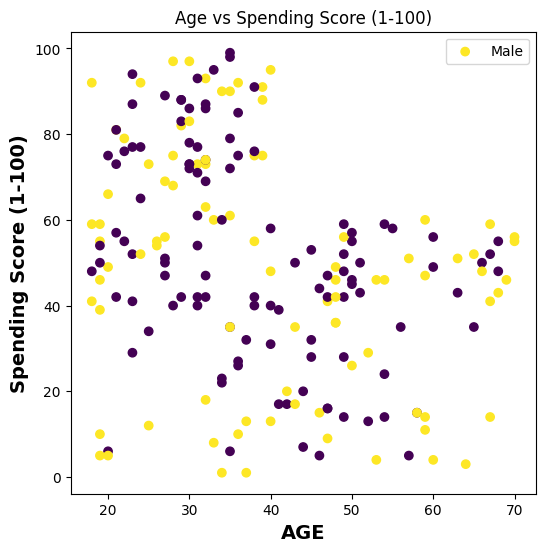

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(df["Age"],df["Spending Score (1-100)"],c=df.Gender.astype('category').cat.codes)
plt.xlabel("AGE",
            fontweight ='bold',
            size=14)
plt.ylabel("Spending Score (1-100)",
           fontweight ='bold',
           size=14)
plt.legend(labels=df.Gender)
plt.title("Age vs Spending Score (1-100)")

<BarContainer object of 200 artists>

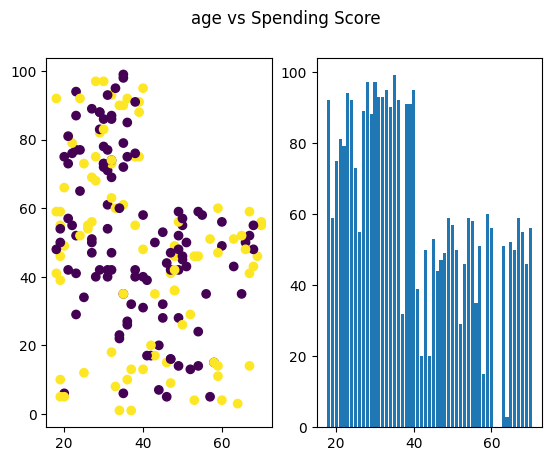

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('age vs Spending Score')
ax1.scatter(df["Age"],df["Spending Score (1-100)"],c=df.Gender.astype('category').cat.codes)
ax2.bar(df["Age"],df["Spending Score (1-100)"])

Text(0.5, 1.0, ' Annual_Income vs Spending Score')

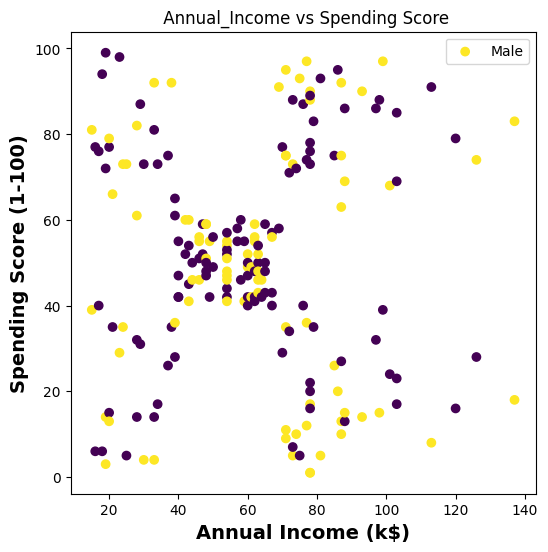

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df.Gender.astype('category').cat.codes)
plt.ylabel("Spending Score (1-100)",
            fontweight ='bold',
            size=14)
plt.xlabel("Annual Income (k$)",
           fontweight ='bold',
           size=14)
plt.legend(labels=df.Gender)
plt.title(" Annual_Income vs Spending Score")

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

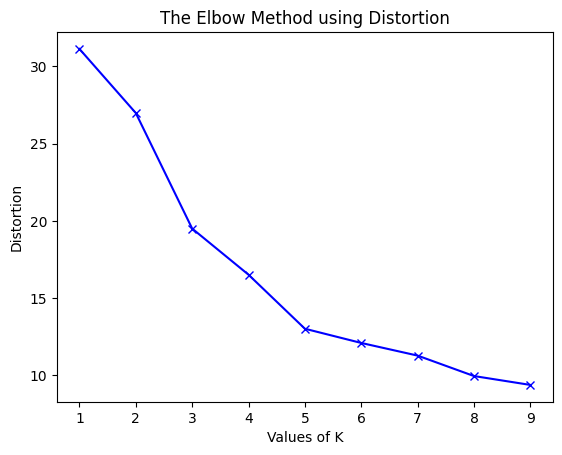

In [18]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

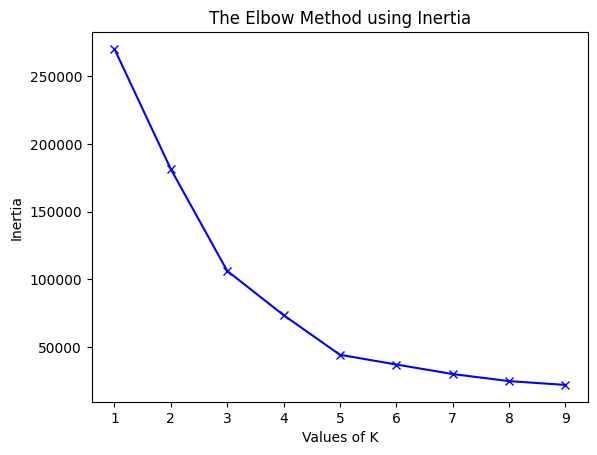

In [19]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [21]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

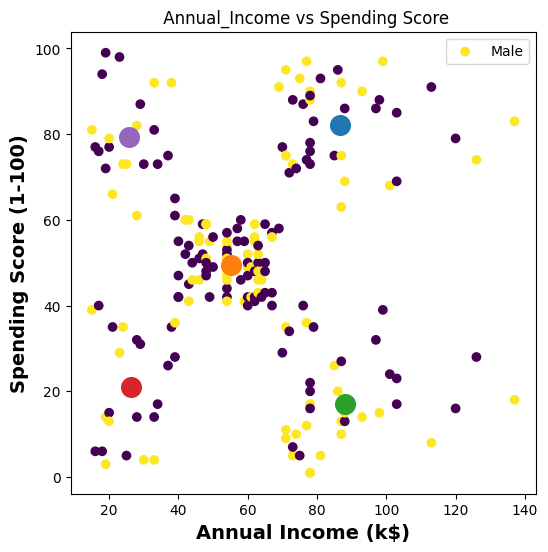

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df.Gender.astype('category').cat.codes)
plt.ylabel("Spending Score (1-100)",
            fontweight ='bold',
            size=14)
plt.xlabel("Annual Income (k$)",
           fontweight ='bold',
           size=14)
plt.legend(labels=df.Gender)
plt.title(" Annual_Income vs Spending Score")
plt.scatter(86.53846154, 82.12820513,s=200)
plt.scatter(55.2962963 , 49.51851852,s=200)
plt.scatter(88.2       , 17.11428571,s=200)
plt.scatter(26.30434783, 20.91304348,s=200)
plt.scatter(25.72727273, 79.36363636,s=200)

In [23]:
df['Cluster'] = kmeans.labels_

In [24]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male,Cluster
0,Male,19,15,39,False,True,0
1,Male,21,15,81,False,True,3
2,Female,20,16,6,True,False,0
3,Female,23,16,77,True,False,3
4,Female,31,17,40,True,False,0
...,...,...,...,...,...,...,...
195,Female,35,120,79,True,False,2
196,Female,45,126,28,True,False,1
197,Male,32,126,74,False,True,2
198,Male,32,137,18,False,True,1


In [25]:
Cluster1=df[df.Cluster==0]
Cluster2=df[df.Cluster==1]
Cluster3=df[df.Cluster==2]
Cluster4=df[df.Cluster==3]
Cluster5=df[df.Cluster==4]

In [26]:
Cluster1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,23.000000,23.000000,23.000000,23.0
mean,45.217391,26.304348,20.913043,0.0
std,13.228607,7.893811,13.017167,0.0
min,19.000000,15.000000,3.000000,0.0
25%,35.500000,19.500000,9.500000,0.0
50%,46.000000,25.000000,17.000000,0.0
75%,53.500000,33.000000,33.500000,0.0
max,67.000000,39.000000,40.000000,0.0


In [27]:
Cluster3.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,2.0
std,3.728650,16.312485,9.364489,0.0
min,27.000000,69.000000,63.000000,2.0
25%,30.000000,75.500000,74.500000,2.0
50%,32.000000,79.000000,83.000000,2.0
75%,35.500000,95.000000,90.000000,2.0
max,40.000000,137.000000,97.000000,2.0


In [28]:
Cluster4.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,22.000000,22.000000,22.000000,22.0
mean,25.272727,25.727273,79.363636,3.0
std,5.257030,7.566731,10.504174,0.0
min,18.000000,15.000000,61.000000,3.0
25%,21.250000,19.250000,73.000000,3.0
50%,23.500000,24.500000,77.000000,3.0
75%,29.750000,32.250000,85.750000,3.0
max,35.000000,39.000000,99.000000,3.0


In [29]:
Cluster5.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,81.000000,81.000000,81.000000,81.0
mean,42.716049,55.296296,49.518519,4.0
std,16.447822,8.988109,6.530909,0.0
min,18.000000,39.000000,34.000000,4.0
25%,27.000000,48.000000,44.000000,4.0
50%,46.000000,54.000000,50.000000,4.0
75%,54.000000,62.000000,55.000000,4.0
max,70.000000,76.000000,61.000000,4.0


In [30]:
df2=df.drop(["Gender","Cluster"],axis=1)

In [31]:
df2

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False
...,...,...,...,...,...
195,35,120,79,True,False
196,45,126,28,True,False
197,32,126,74,False,True
198,32,137,18,False,True


In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
df3 = pd.DataFrame()

# Apply normalization to each column
for column in df2.columns:
    scaler = StandardScaler()
    normalized_column = scaler.fit_transform(df2[column].values.reshape(-1, 1))
    df3[column] = normalized_column.flatten()

In [34]:
df3

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


In [35]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df3)
    kmeanModel.fit(df3)
 
    distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df3.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df3, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df3.shape[0]
    mapping2[k] = kmeanModel.inertia_

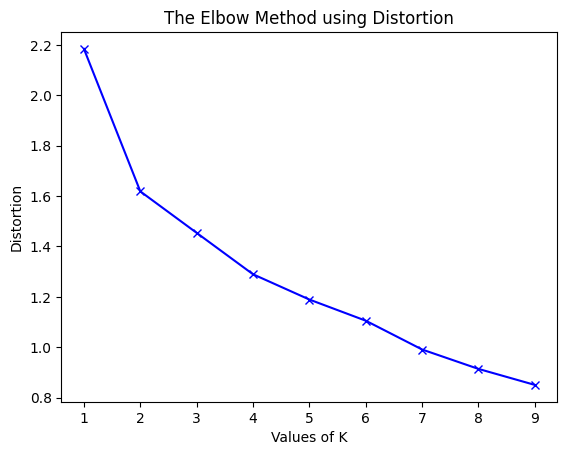

In [36]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

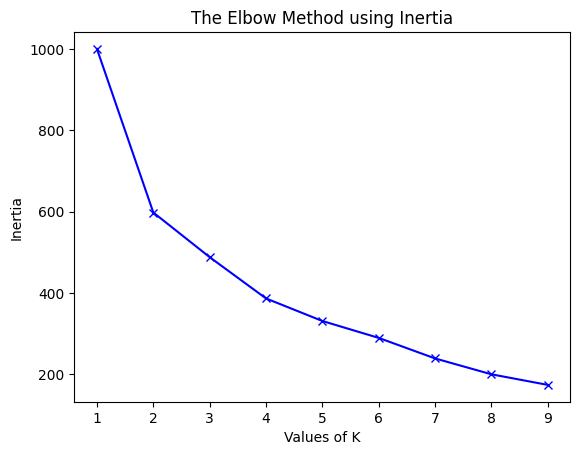

In [37]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [38]:
kmeansnew=KMeans(n_clusters=6)
kmeansnew.fit(df2)

KMeans(n_clusters=6)

In [39]:
df2['Clusters'] = kmeansnew.labels_

In [40]:
df2

,Age,Annual Income (k$),Spending Score (1-100),Female,Male,Clusters
0,19,15,39,False,True,0
1,21,15,81,False,True,1
2,20,16,6,True,False,0
3,23,16,77,True,False,1
4,31,17,40,True,False,0
...,...,...,...,...,...,...
195,35,120,79,True,False,4
196,45,126,28,True,False,2
197,32,126,74,False,True,4
198,32,137,18,False,True,2


In [41]:
Cluster1=df2[df2.Clusters==0]
Cluster2=df2[df2.Clusters==1]
Cluster3=df2[df2.Clusters==2]
Cluster4=df2[df2.Clusters==3]
Cluster5=df2[df2.Clusters==4]
Cluster6=df2[df2.Clusters==5]

In [42]:
Cluster1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,22.000000,22.000000,22.000000,22.0
mean,44.318182,25.772727,20.272727,0.0
std,12.800247,7.646548,12.947446,0.0
min,19.000000,15.000000,3.000000,0.0
25%,35.250000,19.250000,7.750000,0.0
50%,45.500000,24.500000,16.000000,0.0
75%,52.750000,32.250000,31.750000,0.0
max,67.000000,39.000000,40.000000,0.0


In [43]:
Cluster2.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,22.000000,22.000000,22.000000,22.0
mean,25.272727,25.727273,79.363636,1.0
std,5.257030,7.566731,10.504174,0.0
min,18.000000,15.000000,61.000000,1.0
25%,21.250000,19.250000,73.000000,1.0
50%,23.500000,24.500000,77.000000,1.0
75%,29.750000,32.250000,85.750000,1.0
max,35.000000,39.000000,99.000000,1.0


In [44]:
Cluster3.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,35.000000,35.000000,35.000000,35.0
mean,41.685714,88.228571,17.285714,2.0
std,10.897305,16.367266,10.211215,0.0
min,19.000000,71.000000,1.000000,2.0
25%,35.000000,77.500000,10.000000,2.0
50%,43.000000,85.000000,16.000000,2.0
75%,47.500000,97.500000,23.500000,2.0
max,59.000000,137.000000,39.000000,2.0


In [45]:
Cluster4.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,44.000000,44.000000,44.000000,44.0
mean,56.340909,53.704545,49.386364,3.0
std,8.550651,8.239382,5.993081,0.0
min,43.000000,38.000000,35.000000,3.0
25%,49.000000,47.000000,45.750000,3.0
50%,54.000000,54.000000,49.000000,3.0
75%,65.250000,62.000000,55.000000,3.0
max,70.000000,67.000000,60.000000,3.0


In [46]:
Cluster5.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,4.0
std,3.728650,16.312485,9.364489,0.0
min,27.000000,69.000000,63.000000,4.0
25%,30.000000,75.500000,74.500000,4.0
50%,32.000000,79.000000,83.000000,4.0
75%,35.500000,95.000000,90.000000,4.0
max,40.000000,137.000000,97.000000,4.0


In [47]:
Cluster6.describe()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,38.000000,38.000000,38.000000,38.0
mean,27.000000,56.657895,49.131579,5.0
std,7.032742,9.905708,7.853975,0.0
min,18.000000,39.000000,29.000000,5.0
25%,21.000000,48.000000,42.000000,5.0
50%,26.500000,59.500000,50.000000,5.0
75%,31.750000,63.750000,55.000000,5.0
max,40.000000,76.000000,61.000000,5.0
